In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
import sys
sys.path.append('/content/drive/AutoAugment')

# AutoAugment

### Need to download the code from github (https://github.com/DeepVoltaire/AutoAugment), and import the it from colab, input the two code. Run the following two boxes to import AutoAugment.


In [6]:
from google.colab import files
src = list(files.upload().values())[0]
open('/content/drive/MyDrive/AutoAugment/ops.py','wb').write(src)

Saving ops.py to ops (1).py


2843

In [8]:
src = list(files.upload().values())[0]
open('/content/drive/MyDrive/AutoAugment/autoaugment.py','wb').write(src)
import autoaugment

Saving autoaugment.py to autoaugment.py


In [9]:
from torchvision import datasets, transforms, utils
from torch.utils.data import Dataset, DataLoader
%reload_ext autoreload
%autoreload 2

from PIL import Image, ImageEnhance, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pdb
from autoaugment import ImageNetPolicy, CIFAR10Policy, SVHNPolicy, SubPolicy
#import imgaug.augmenters as iaa
import collections
import os

In [ ]:
def show_sixteen(images, titles=0):
    f, axarr = plt.subplots(5, 2, figsize=(15, 15), gridspec_kw={"wspace": 0, "hspace": 0})
    for idx, ax in enumerate(f.axes):
        ax.imshow(images[idx])
        ax.axis("off")
        if titles: ax.set_title(titles[idx])
    plt.show()

In [34]:
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.Compose(
                        [#transforms.RandomCrop(32, padding=4, fill=128), # fill parameter needs torchvision installed from source
                         #transforms.RandomHorizontalFlip(),
                         CIFAR10Policy(),
			                   transforms.ToTensor(),
                         #Cutout(n_holes=1, length=16), # (https://github.com/uoguelph-mlrg/Cutout/blob/master/util/cutout.py)
                         #transforms.Normalize(...)
                         #transforms.Grayscale(num_output_channels=1),
                         ]))

print(len(train_dataset))

Files already downloaded and verified
50000


In [35]:
# Dataloader for the training set
batch_size = 1
train_loader = DataLoader(train_dataset, batch_size=batch_size)


In [ ]:
# read the first 1200 images from each class (10 classes in total) and save it into gdrive.

imgs, count = [], 0
file_count = collections.defaultdict(int)
path1 = os.path.join('/content/drive/MyDrive/AutoAugment','autoaug', 'cifar10')
if not os.path.exists(path1):
    os.makedirs(path1)

for img in train_loader:
    item = img[1].item()
    img = np.transpose(img[0][0].numpy() * 255, (1, 2, 0)).astype(np.uint8)

    img = Image.fromarray(img)

    if file_count[str(item)] < 1200:
        file_count[str(item)] += 1
        #plt.axis("off")
        subpath = os.path.join(path1,'cifar-10-'+str(item))
        if not os.path.exists(subpath):
            os.makedirs(subpath)
        img.save(os.path.join(subpath, str(file_count[str(item)]) + '.png'))
    else:
        pass

    if all(i >= 1200 for i in list(file_count.values())):
        break

# Imgaug: RandAugment

### https://imgaug.readthedocs.io/en/latest/source/overview/collections.html#randaugment

In [14]:
# generate the training dataset from cifar10 with RandAugment as transforms.
batch_size = 1
train_dataset_imgaug = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.Compose(
                        [#transforms.RandomCrop(32, padding=4, fill=128), # fill parameter needs torchvision installed from source
                         #transforms.RandAugment(),
                         transforms.RandAugment(),
                         transforms.ToTensor(),
                         #Cutout(n_holes=1, length=16), # (https://github.com/uoguelph-mlrg/Cutout/blob/master/util/cutout.py)
                         #transforms.Normalize(...)
                         #transforms.Grayscale(num_output_channels=1),
                         ]))

print(len(train_dataset_imgaug))

train_loader_imgaug = DataLoader(train_dataset_imgaug, batch_size=batch_size)

Files already downloaded and verified
50000


In [ ]:
# read the first 1200 images from each class (10 classes in total) and save it into gdrive.

imgs, count = [], 0
file_count = collections.defaultdict(int)
path1 = os.path.join('/content/drive/MyDrive/AutoAugment','imgaug','cifar10')
if not os.path.exists(path1):
    os.makedirs(path1)
for img in train_loader_imgaug:
    item = img[1].item()
    img = np.transpose(img[0][0].numpy() * 255, (1, 2, 0)).astype(np.uint8)
    img = Image.fromarray(img)

    if file_count[str(item)] < 1200:
        file_count[str(item)] += 1
        #plt.axis("off")
        subpath = os.path.join(path1,'cifar-10-'+str(item))
        if not os.path.exists(subpath):
            os.makedirs(subpath)
        img.save(os.path.join(subpath, str(file_count[str(item)]) + '.png'))
    else:
        pass

    if all(i >= 1200 for i in list(file_count.values())):
        break

Original data and augmented data

In [12]:
batch_size = 1
train_dataset_ori = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.Compose(
                        [#transforms.RandomCrop(32, padding=4, fill=128), # fill parameter needs torchvision installed from source
                         #transforms.RandAugment(),
                         #transforms.RandAugment(),
                         transforms.ToTensor(),
                         #Cutout(n_holes=1, length=16), # (https://github.com/uoguelph-mlrg/Cutout/blob/master/util/cutout.py)
                         #transforms.Normalize(...)
                         #transforms.Grayscale(num_output_channels=1),
                         ]))

train_loader_ori = DataLoader(train_dataset_ori, batch_size=batch_size)

Files already downloaded and verified


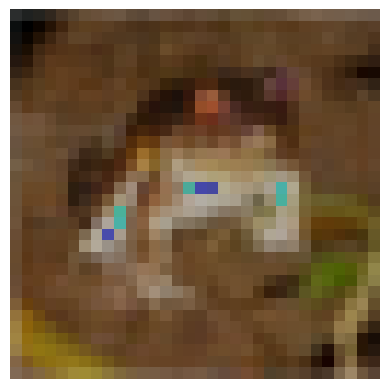

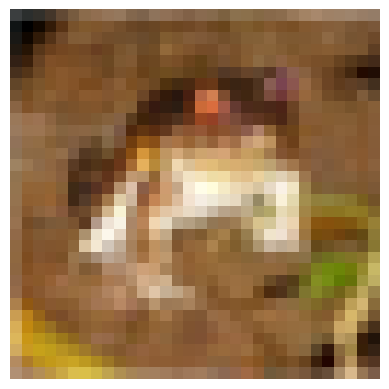

In [33]:
for img,img_ori in zip(train_loader_imgaug, train_loader_ori):
    item = img[1].item()
    img = np.transpose(img[0][0].numpy() * 255, (1, 2, 0)).astype(np.uint8)
    #img = Image.fromarray(img)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    item = img_ori[1].item()
    img = np.transpose(img_ori[0][0].numpy() * 255, (1, 2, 0)).astype(np.uint8)
    #img = Image.fromarray(img)
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    break


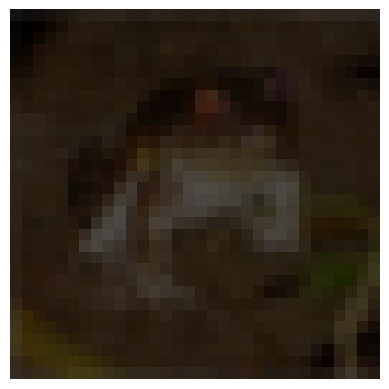

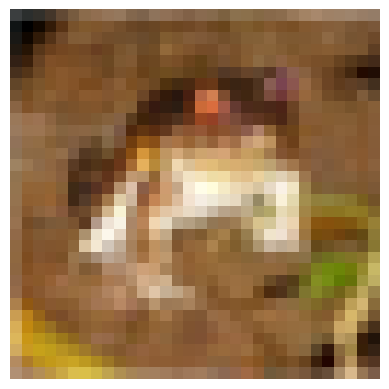

In [50]:
for img,img_ori in zip(train_loader, train_loader_ori):
    item = img[1].item()
    img = np.transpose(img[0][0].numpy() * 255, (1, 2, 0)).astype(np.uint8)
    #img = Image.fromarray(img)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    item = img_ori[1].item()
    img = np.transpose(img_ori[0][0].numpy() * 255, (1, 2, 0)).astype(np.uint8)
    #img = Image.fromarray(img)
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    break